# 🔥Exploration 6. 멋진 작사가 만들기🔥

## 🎯프로젝트 목표🎯
### - 노래 가사 데이터를 가지고 자연어 처리 모델을 생성, 자신만의 작사해보기

## ✅프로젝트 순서✅
### 0. 개념 정리
### 1. 데이터 다운로드
### 2. 데이터 불러오기
### 3. 데이터 정제
### 4. 평가 데이터셋 분리
### 5. 인공지능 만들기
### 6. 루브릭 평가 및 회고

## ⏰자연어 처리 흐름 및 순서 정리⏰
### 1) 데이터 확보
### 2) 데이터 정제 - 정규 표현식 및 공백 제거, 대/소문자 통일, \<start>, \<end> 추가 등
- 정규표현식을 이용한 말뭉치(corpus) 생성  

### 3) 토큰화 - tf.keras.preprocessing.text.Tokenizer패키지 사용, 사전 생성
- tf.keras.preprocessing.text.Tokenizer를 이용해 corpus를 텐서로 변환
- tf.data.Dataset.from_tensor_slices()를 이용해 corpus 텐서를 tf.data.Dataset객체로 변환  

### 4) tf.data.Dataset 변환

### 5) 데이터 셋 분리 - Train, Test

## >> 2)~ 5) 과정을 데이터 전처리라고 부른다.

### 4) 모델 생성

### 5) 평가

***

## 0. 개념 정리 

### 1) 시퀀스
- 데이터 순서(번호)를 붙여 나열한 것.

### 2) 시퀀스의 특징
- 데이터를 순서대로 하나씩 나열하여 나타낸 데이터 구조
- 특정 위치(\~번째)의 데이터를 가리킬 수 있다.  
!꼭 시퀀스 데이터가 어떤 정렬 규칙이 꼭 있는 것이 아니다.!
(출처: https://python.bakyeono.net/chapter-5-2.html)

문장도 어떤 순서를 가지고 형성되고 있다. 이를 '문법'이라고 하는데 인공지능에게 문법을 알려주는 방법은 **통계**에 기반하면 된다.
그리고 많은 데이터를 이용해 학습한다면 '나는 밥을'이라는 문장 뒤에 '먹었다'라는 말을 완성시킬 수 있게 할 것이다.

### 3) 순환신경망(RNN)
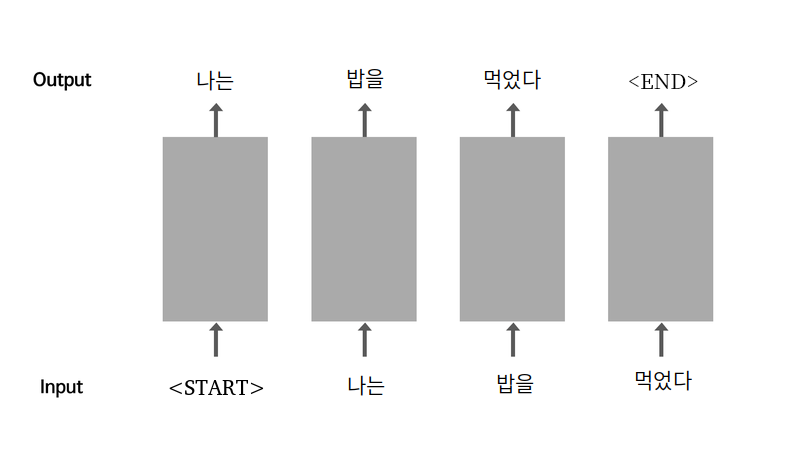
- \<start>는 인공지능에게 문장이 시작함을 알려주는 역할을 하는 토큰이다.
- \<start>를 입력으로 받으면 '나는'을 출력하고 이를 다시 입력으로 활용해 그 뒤에 나올 단어를 예측하면서 문장을 완성시키고 완성 후에는 \<end> 출력  
즉, **\<start> + 문장** 으로 이루어진 <span style="color:red"><U>입력 데이터(문제지)</U></span>와 **문장 + \<end>** 으로 이루어진 <span style="color:red"><U>출력 데이터(답안지)</U></span>가 필요!

### 4) 언어 모델(Language Model)
- 어떤 단어 다음에 어떤 단어가 올 지 예측 가능한 모델(예시: '나는' 다음에 '밥을'이라는 단어도 자연스럽지만 다른 무수한 경우가 있다.)

   **위에서 언급한 순환 신경망은 이 방법에서 유리하다. 일정한 단어 시퀀스가 주어진다면, 다음 단어를 계속 예측할 수 있다.**
### >> 즉, 잘 학습된 언어 모델은 훌륭한 문장 생성기로 동작 가능


### 5) 토큰화(Tokenize)
- 문장을 일정한 기준으로 나누는 것 (가장 간단한 방법은 띄어쓰기로 나눌 수 있으며, 데이터 성격에 따라 분석자가 지정한다.)

### 6) 소스 문장(Source Sentence)와 타겟 문장(Target Sentence)
- 소스 문장: 자연어 처리 모델의 입력이 되는 문장(X_train)
- 타겟 문장: 정답 역할을 하게 될 문장(Y_train)

### 7) 텐서, 벡터화
- 벡터화: 인공지능에게 자연어를 입력하기 위해 숫자로 변환하는 과정
- 텐서: 벡터화를 통해 자연어 -> 숫자로 변환된 데이터(모두 정수로 이루어져 있음)

   **우리가 사용하는 텐서플로우로 만든 모델의 입출력 데이터는 실제로는 모두 텐서로 변환되어 처리됨**
   
### 8) tf.data.Dataset
- tf.data.Dataset객체는 텐서플로우에서 사용할 경우 데이터 입력 파이프라인을 통한 속도 개선 및 각종 편의기능을 제공
- tf.data.Dataset.from_tensor_slices()를 이용해 텐서 형태의 데이터셋을 이용해 생성 가능  
\- 기존에는 Numpy Array 데이터셋을 생성하여 model에 제공하는 형태의 학습을 많이 진행했으나  
   텐서플로우를 활용할 경우 텐서로 생성된 데이터를 이용해 tf.data.Dataset객체를 생성하는 방법을 흔하다.

***

## 1. 데이터 다운로드
- Songs Lyrics 데이터

- 터미널에서 아래 명령어 실시  
$ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/song_lyrics.zip

***

## 2. 데이터 불러오기

In [1]:
import glob
import os

txt_file_path = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E06_Lyrics_maker/lyricist/data/lyrics/*'

txt_list = glob.glob(txt_file_path)

raw_corpus = []

# 여러개의 txt 파일을 모두 읽어서 raw_corpus 에 담습니다.
for txt_file in txt_list:
    with open(txt_file, "r") as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)

print("데이터 크기:", len(raw_corpus)) # 187,088
print("Examples:\n", raw_corpus[:10]) # 데이터 확인

데이터 크기: 187088
Examples:
 ["I'll undress you, 'cause you're tired", 'Cover you as you desire', 'When you fall asleep inside my arms', 'May not have the fancy things', "But I'll give you everything", "You could ever want, it's in my arms So baby tell me yes", 'And I will give you everything', 'So baby tell me yes', 'And I will be all yours tonight', 'So baby tell me yes']


***

## 3. 데이터 정제

### 3-1. preprocess_sentence() 함수제작
- 1) 입력 문장을 소문자로 변경 & 양쪽 공백 제거: .lower().strip()
- 2) 정규 표현식을 이용해 스페이스 1개를 구분자로 하는 소문자 기반의 단어 시퀀스로 변경
- 3) 문장 앞에는 \<start>를 문장 뒤에는 \<end>를 붙인다.

In [2]:
import re

def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()       # 소문자로 바꾸고 양쪽 공백을 삭제

    # 아래 3단계를 거쳐 sentence는 스페이스 1개를 delimeter(구분자)로 하는 소문자 단어 시퀀스로 바뀝니다.
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence)        # 패턴의 특수문자를 만나면 특수문자 양쪽에 공백을 추가
    sentence = re.sub(r'[" "]+', " ", sentence)                  # 공백 패턴을 만나면 스페이스 1개로 치환
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence)  # a-zA-Z?.!,¿ 패턴을 제외한 모든 문자(공백문자까지도)를 스페이스 1개로 치환

    sentence = sentence.strip()

    sentence = '<start> ' + sentence + ' <end>'      # 이전 스텝에서 본 것처럼 문장 앞뒤로 <start>와 <end>를 단어처럼 붙여 줍니다

    return sentence

print(preprocess_sentence("This @_is ;;;sample        sentence."))   # 이 문장이 어떻게 필터링되는지 확인해 보세요.
print(preprocess_sentence("Thissentence."))   # 이 문장이 어떻게 필터링되는지 확인해 보세요.
print(preprocess_sentence("I eat lunch"))

<start> this is sample sentence . <end>
<start> thissentence . <end>
<start> i eat lunch <end>


### 3-2. corpus(말뭉치) 만들기
#### 길이가 == 0(데이터가 없다) 경우는 제외 후 위에서 정의한 함수 preprocess_sentence를 통해 정규화 후 리스트 생성

In [3]:
corpus = []

for sentence in raw_corpus:
    if len(sentence) == 0: continue # 길이가 0인 문장은 건너뜁니다
    if len(sentence) > 50: continue
    if sentence[-1] == ":": continue # 문장의 끝이 :인 문장은 건너뜁니다
        
    corpus.append(preprocess_sentence(sentence))
        
corpus[:10]

['<start> i ll undress you , cause you re tired <end>',
 '<start> cover you as you desire <end>',
 '<start> when you fall asleep inside my arms <end>',
 '<start> may not have the fancy things <end>',
 '<start> but i ll give you everything <end>',
 '<start> and i will give you everything <end>',
 '<start> so baby tell me yes <end>',
 '<start> and i will be all yours tonight <end>',
 '<start> so baby tell me yes <end>',
 '<start> and i will give you everything <end>']

### 3-3. 토큰화 진행

- 너무 긴 문장은 제외(최대 토큰의 개수 = 15)

In [4]:
import tensorflow as tf 

def tokenize(corpus):
    # 텐서플로우에서 제공하는 Tokenizer 패키지를 생성
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=7000,  # 전체 단어의 개수 
        filters=' ',    # 별도로 전처리 로직을 추가할 수 있습니다. 이번에는 사용하지 않겠습니다.
        oov_token="<unk>"  # out-of-vocabulary, 사전에 없었던 단어는 어떤 토큰으로 대체할지
    )
    tokenizer.fit_on_texts(corpus)   # 우리가 구축한 corpus로부터 Tokenizer가 사전을 자동구축하게 됩니다.

    # 이후 tokenizer를 활용하여 모델에 입력할 데이터셋을 구축하게 됩니다.
    tensor = tokenizer.texts_to_sequences(corpus)   # tokenizer는 구축한 사전으로부터 corpus를 해석해 Tensor로 변환합니다.

    # 입력 데이터의 시퀀스 길이를 일정하게 맞추기 위한 padding  메소드를 제공합니다.
    # maxlen의 디폴트값은 None입니다. 이 경우 corpus의 가장 긴 문장을 기준으로 시퀀스 길이가 맞춰집니다.
    # maxlen=15를 설정해서 토큰의 개수가 15개를 최대로 설정, 15개 초과하는 데이터는 제외
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post', maxlen=15)

    print(tensor,tokenizer)
    return tensor, tokenizer

tensor, tokenizer = tokenize(corpus)

[[   2    4   61 ...    0    0    0]
 [   2 1056    7 ...    0    0    0]
 [   2   48    7 ...    0    0    0]
 ...
 [   2    4   68 ...    0    0    0]
 [   2    8   85 ...    0    0    0]
 [   2    8   22 ...    0    0    0]] <keras_preprocessing.text.Tokenizer object at 0x7f6a04680790>


In [5]:
print(len(tensor[10])) # 텐서의 길이 확인: maxlen설정으로 인해 15로 설정됨

15


### 3-4. 인덱스 확인
- 2:\<start>이기 때문에 텐서를 확인하면 2로 시작하고
- 3:\<end>이기 때문에 문장이 끝날 때는 3으로 표현되며
- 0:\<pad>이기 때문에 문장 뒷부분 비어있는 곳은 0으로 표현

In [6]:
for idx in tokenizer.index_word:
    print(idx, ":", tokenizer.index_word[idx])

    if idx >= 10: break

1 : <unk>
2 : <start>
3 : <end>
4 : i
5 : ,
6 : the
7 : you
8 : and
9 : a
10 : to


### 3-5. 소스 문장, 타겟 문장
- 소스 문장: 자연어 처리 모델에서 입력 문장
- 타겟 문장: 자연어 처리 모델에서 정답 문장

In [7]:
src_input = tensor[:, :-1]  # tensor에서 마지막 토큰을 잘라내서 소스 문장을 생성합니다. 마지막 토큰은 <end>가 아니라 <pad>일 가능성이 높습니다.
tgt_input = tensor[:, 1:]    # tensor에서 <start>를 잘라내서 타겟 문장을 생성합니다.

print(src_input[0])
print(tgt_input[0])
print(len(src_input))
print(len(tgt_input))

[   2    4   61 2711    7    5   72    7   54  638    3    0    0    0]
[   4   61 2711    7    5   72    7   54  638    3    0    0    0    0]
142443
142443


***

## 4. 평가 데이터셋 분리

##  Train, Test 데이터 분리 (Train: 80%, Test: 20%)

In [8]:
# train, test 분리

from sklearn.model_selection import train_test_split

enc_train, enc_val, dec_train, dec_val = train_test_split(src_input,
                                                          tgt_input,
                                                          test_size=0.2,
                                                          shuffle=True)

print("Source Train:", enc_train.shape) # 소스 문장
print("Target Train:", dec_train.shape) # 타겟 문장

Source Train: (113954, 14)
Target Train: (113954, 14)


In [9]:
BUFFER_SIZE = len(src_input)
BATCH_SIZE = 256
steps_per_epoch = len(src_input) // BATCH_SIZE

VOCAB_SIZE = tokenizer.num_words + 1    # tokenizer가 구축한 단어사전 내 7000개와, 여기 포함되지 않은 0:<pad>를 포함하여 7001개

dataset1 = tf.data.Dataset.from_tensor_slices((enc_train, dec_train)).shuffle(BUFFER_SIZE)
dataset1 = dataset1.batch(BATCH_SIZE, drop_remainder=True)
print(dataset1)

dataset2 = tf.data.Dataset.from_tensor_slices((enc_val, dec_val)).shuffle(BUFFER_SIZE)
dataset2 = dataset2.batch(BATCH_SIZE, drop_remainder=True)
print(dataset2)

<BatchDataset shapes: ((256, 14), (256, 14)), types: (tf.int32, tf.int32)>
<BatchDataset shapes: ((256, 14), (256, 14)), types: (tf.int32, tf.int32)>


## 5. 인공지능 만들기
- 모델의 Embedding Size와 Hidden Size를 조절하며 10 Epoch 안에 val_loss 값을 2.2 수준으로 줄일 수 있는 모델을 설계하세요! 

### 5-1. 모델 생성 (1개의 Embedding 레이어, 2개의 LSTM 레이어, 1개의 Dense 레이어로 구성)
###  >> tf.keras.Model을 Subclassing하는 방식으로 만들었다.

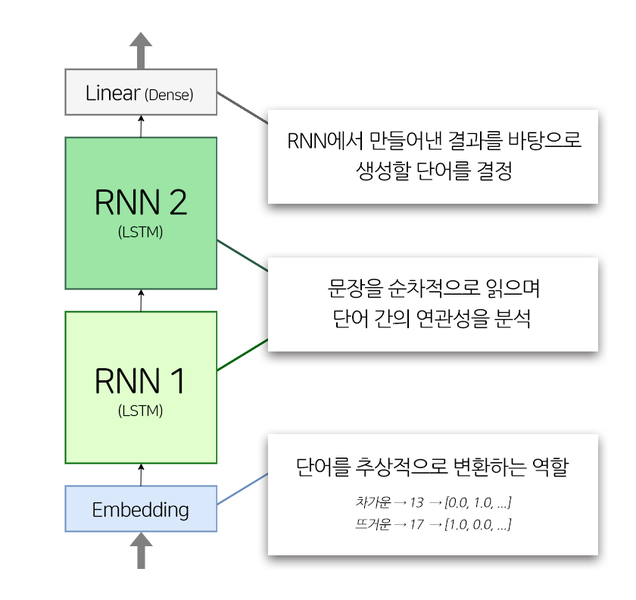

In [10]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super(TextGenerator, self).__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out
    
embedding_size = 256
"""
embedding_size: 워드벡터의 차원수 즉, 단어가 추상적으로 표현되는 크기.
> 입력 텐서에는 단어 사전의 인덱스가 들어 있고, Embedding 레이어는 이 인덱스 값을 해당 인덱스의 워드 벡터로 바꿔 줍니다. 
이 워드 벡터는 의미 벡터 공간에서 단어의 추상적 표현(representation)으로 사용
embedding_size가 너무 커도 너무 작아도 문제 --> 여기서는 256로 설정
"""
hidden_size = 1024
"""
hidden_size: LSTM 레이어의 hidden state 의 차원수.
> 얼마나 많은 일꾼을 둘 것인지? 너무 많다면 배가 산으로 가고 너무 적으면 성능이 낮다. 여기서는 1024로 적당히 설정
"""
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)

In [11]:
"""
shape을 확인해보면 (256,14,7001)인데 
7001은 Dense 레이어의 출력 차원수. 7001개의 단어 중 어느 단어의 확률이 가장 높을 지 모델링 해야함.

256은 이전 스텝에서 배치 사이즈. dataset.take(1)을 통해 1개의 배치, 즉 256개의 문장 데이터를 가져온 것.

14는 tf.keras.layers.LSTM(hidden_size, return_sequences=True)로 호출한 LSTM 레이어에서 return_sequences=True이라고 지정한 부분에 있다.
즉, LSTM은 자신에게 입력된 시퀀스의 길이만큼 동일한 길이의 시퀀스를 출력한다는 의미.
만약 return_sequences=False였다면 LSTM 레이어는 1개의 벡터만 출력했을 것.
하지만 우리의 모델은 입력 데이터의 시퀀스 길이가 얼마인지 모른다는 점. 모델을 만들면서 지정하지도 않았다.
즉, 데이터를 입력받으면서 비로소 알게 된 것입니다. 우리 데이터셋의 max_len이 14으로 맞춰져 있었던 것
"""

'\nshape을 확인해보면 (256,14,7001)인데 \n7001은 Dense 레이어의 출력 차원수. 7001개의 단어 중 어느 단어의 확률이 가장 높을 지 모델링 해야함.\n\n256은 이전 스텝에서 배치 사이즈. dataset.take(1)을 통해 1개의 배치, 즉 256개의 문장 데이터를 가져온 것.\n\n14는 tf.keras.layers.LSTM(hidden_size, return_sequences=True)로 호출한 LSTM 레이어에서 return_sequences=True이라고 지정한 부분에 있다.\n즉, LSTM은 자신에게 입력된 시퀀스의 길이만큼 동일한 길이의 시퀀스를 출력한다는 의미.\n만약 return_sequences=False였다면 LSTM 레이어는 1개의 벡터만 출력했을 것.\n하지만 우리의 모델은 입력 데이터의 시퀀스 길이가 얼마인지 모른다는 점. 모델을 만들면서 지정하지도 않았다.\n즉, 데이터를 입력받으면서 비로소 알게 된 것입니다. 우리 데이터셋의 max_len이 14으로 맞춰져 있었던 것\n'

"""
model이 제대로 build가 되지 않았고 model.compile()도 호출하지 않았으며 아직 model의 입력 텐서를 제대로 지정하지 않았다.
이럴 땐 아래와 같이 model에 데이터를 아주 조금 태워 보는 것도 방법입니다. model의 input shape가 결정되면서 model.build()가 자동으로 호출
"""

"""
shape을 확인해보면 (256,14,7001)인데 
7001은 Dense 레이어의 출력 차원수. 7001개의 단어 중 어느 단어의 확률이 가장 높을 지 모델링 해야함.

256은 이전 스텝에서 배치 사이즈. dataset.take(1)을 통해 1개의 배치, 즉 256개의 문장 데이터를 가져온 것.

14는 tf.keras.layers.LSTM(hidden_size, return_sequences=True)로 호출한 LSTM 레이어에서 return_sequences=True이라고 지정한 부분에 있다.
즉, LSTM은 자신에게 입력된 시퀀스의 길이만큼 동일한 길이의 시퀀스를 출력한다는 의미.
만약 return_sequences=False였다면 LSTM 레이어는 1개의 벡터만 출력했을 것.
하지만 우리의 모델은 입력 데이터의 시퀀스 길이가 얼마인지 모른다는 점. 모델을 만들면서 지정하지도 않았다.
즉, 데이터를 입력받으면서 비로소 알게 된 것입니다. 우리 데이터셋의 max_len이 14으로 맞춰져 있었던 것
"""

In [12]:
"""
model이 제대로 build가 되지 않았고 model.compile()도 호출하지 않았으며 아직 model의 입력 텐서를 제대로 지정하지 않았다.
이럴 땐 아래와 같이 model에 데이터를 아주 조금 태워 보는 것도 방법입니다. model의 input shape가 결정되면서 model.build()가 자동으로 호출
"""
for src_sample, tgt_sample in dataset1.take(1): break
print(model(src_sample))
"""
shape을 확인해보면 (256,14,7001)인데 
7001은 Dense 레이어의 출력 차원수. 7001개의 단어 중 어느 단어의 확률이 가장 높을 지 모델링 해야함.

256은 이전 스텝에서 배치 사이즈. dataset.take(1)을 통해 1개의 배치, 즉 256개의 문장 데이터를 가져온 것.

14는 tf.keras.layers.LSTM(hidden_size, return_sequences=True)로 호출한 LSTM 레이어에서 return_sequences=True이라고 지정한 부분에 있다.
즉, LSTM은 자신에게 입력된 시퀀스의 길이만큼 동일한 길이의 시퀀스를 출력한다는 의미.
만약 return_sequences=False였다면 LSTM 레이어는 1개의 벡터만 출력했을 것.
하지만 우리의 모델은 입력 데이터의 시퀀스 길이가 얼마인지 모른다는 점. 모델을 만들면서 지정하지도 않았다.
즉, 데이터를 입력받으면서 비로소 알게 된 것입니다. 우리 데이터셋의 max_len이 14으로 맞춰져 있었던 것
"""

tf.Tensor(
[[[ 1.19130927e-04 -2.09245860e-04  2.30791353e-04 ...  7.09823798e-05
    9.03457112e-05  2.65522285e-05]
  [ 2.22449598e-04 -4.48564155e-04  7.65638251e-05 ... -2.12569998e-04
    1.49212879e-04  2.11663151e-04]
  [ 3.06302420e-04 -4.87818645e-04 -1.79209761e-04 ... -1.80674178e-04
   -2.13279018e-05  2.67908734e-04]
  ...
  [-1.72986602e-05  5.85575646e-04 -1.08942983e-03 ...  8.71227297e-04
    1.23200763e-03 -2.27123412e-04]
  [ 2.76290666e-04  9.48876957e-04 -7.72763218e-04 ...  1.11489836e-03
    1.04110094e-03  1.28839558e-04]
  [ 6.61344908e-04  1.27327477e-03 -4.09059023e-04 ...  1.41364289e-03
    7.54758832e-04  5.35170431e-04]]

 [[ 1.19130927e-04 -2.09245860e-04  2.30791353e-04 ...  7.09823798e-05
    9.03457112e-05  2.65522285e-05]
  [ 1.55496018e-04 -2.57312233e-04  1.00337100e-04 ... -4.35350303e-05
    3.22657113e-04 -5.63294270e-05]
  [ 3.56874283e-04 -1.70476240e-04 -2.16725020e-04 ...  1.95773719e-05
    2.77893530e-04  8.84376132e-05]
  ...
  [ 1.294011

'\nshape을 확인해보면 (256,14,7001)인데 \n7001은 Dense 레이어의 출력 차원수. 7001개의 단어 중 어느 단어의 확률이 가장 높을 지 모델링 해야함.\n\n256은 이전 스텝에서 배치 사이즈. dataset.take(1)을 통해 1개의 배치, 즉 256개의 문장 데이터를 가져온 것.\n\n14는 tf.keras.layers.LSTM(hidden_size, return_sequences=True)로 호출한 LSTM 레이어에서 return_sequences=True이라고 지정한 부분에 있다.\n즉, LSTM은 자신에게 입력된 시퀀스의 길이만큼 동일한 길이의 시퀀스를 출력한다는 의미.\n만약 return_sequences=False였다면 LSTM 레이어는 1개의 벡터만 출력했을 것.\n하지만 우리의 모델은 입력 데이터의 시퀀스 길이가 얼마인지 모른다는 점. 모델을 만들면서 지정하지도 않았다.\n즉, 데이터를 입력받으면서 비로소 알게 된 것입니다. 우리 데이터셋의 max_len이 14으로 맞춰져 있었던 것\n'

- 모델의 최종 출력 shape를 자세히 보면 (256, 14, 7001)이고
- 1) 256: 문장 데이터 개수(이전 스텝에서 지정한 배치 사이즈)
- 2) 14: tf.keras.layers.LSTM(hidden_size, return_sequences=True)로 호출한 LSTM 레이어에서 return_sequences=True라고 지정했기에(LSTM은 자신에게 입력된 시퀀스의 길이와 동일한 길이의 시퀀스를 출력) max_len에서 지정한 값이 나온 것. False였다면 LSTM레이어는 1개의 벡터만 출력
- 3) 7001: Dense레이어의 출력 차원수. 

In [13]:
model.summary()

Model: "text_generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  1792256   
_________________________________________________________________
lstm (LSTM)                  multiple                  5246976   
_________________________________________________________________
lstm_1 (LSTM)                multiple                  8392704   
_________________________________________________________________
dense (Dense)                multiple                  7176025   
Total params: 22,607,961
Trainable params: 22,607,961
Non-trainable params: 0
_________________________________________________________________


In [14]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction='none'
)

model.compile(loss=loss, 
              optimizer=optimizer,
              metrics=['accuracy'])

In [15]:
model_history = model.fit(dataset1,
                          validation_data = dataset2,
                          epochs=10)

Epoch 1/10
445/445 [==============================] - 52s 117ms/step - loss: 3.1951 - accuracy: 0.5155 - val_loss: 2.8461 - val_accuracy: 0.5445
Epoch 2/10
445/445 [==============================] - 51s 114ms/step - loss: 2.7465 - accuracy: 0.5519 - val_loss: 2.6645 - val_accuracy: 0.5584
Epoch 3/10
445/445 [==============================] - 51s 114ms/step - loss: 2.5779 - accuracy: 0.5639 - val_loss: 2.5472 - val_accuracy: 0.5677
Epoch 4/10
445/445 [==============================] - 51s 115ms/step - loss: 2.4503 - accuracy: 0.5732 - val_loss: 2.4649 - val_accuracy: 0.5753
Epoch 5/10
445/445 [==============================] - 51s 116ms/step - loss: 2.3417 - accuracy: 0.5822 - val_loss: 2.4046 - val_accuracy: 0.5819
Epoch 6/10
445/445 [==============================] - 54s 122ms/step - loss: 2.2438 - accuracy: 0.5912 - val_loss: 2.3474 - val_accuracy: 0.5892
Epoch 7/10
445/445 [==============================] - 53s 120ms/step - loss: 2.1521 - accuracy: 0.6007 - val_loss: 2.3020 - val_ac

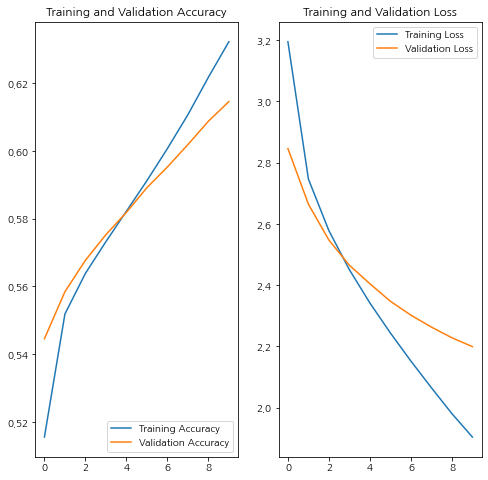

✅


In [16]:
import matplotlib.pyplot as plt

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss=model_history.history['loss']
val_loss=model_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
print("✅")

### 5-2. 평가하기
- 시작 문장을 입력하면 입력된 값을 바탕으로 모델이 작문을 하는 함수 작성

In [17]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20):
    # 테스트를 위해서 입력받은 init_sentence도 일단 텐서로 변환합니다.
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    # 텍스트를 실제로 생성할때는 루프를 돌면서 단어 하나씩 생성해야 합니다. 
    while True:
        predict = model(test_tensor)  # 입력받은 문장의 텐서를 입력합니다. 
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1]   # 우리 모델이 예측한 마지막 단어가 바로 새롭게 생성한 단어가 됩니다. 

        # 우리 모델이 새롭게 예측한 단어를 입력 문장의 뒤에 붙여 줍니다. 
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)

        # 우리 모델이 <end>를 예측했거나, max_len에 도달하지 않았다면  while 루프를 또 돌면서 다음 단어를 예측해야 합니다.
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    # 생성된 tensor 안에 있는 word index를 tokenizer.index_word 사전을 통해 실제 단어로 하나씩 변환합니다. 
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated   # 이것이 최종적으로 모델이 생성한 자연어 문장입니다.

In [18]:
generate_text(model, tokenizer, init_sentence="<start> i love", max_len=20)

'<start> i love you <end> '

***

## 6. 루브릭 평가 및 회고

### 6-1. 루브릭 평가

### 1) 가사 텍스트 생성 모델이 정상적으로 동작하는가?
#### - 5에서 생성한 모델이 잘 작동한다.
### 2) 데이터의 전처리와 데이터셋 구성 과정이 체계적으로 진행되었는가?
#### - 정규 표현식을 이용해 문장 구조가 학습에 잘 이용될 수 있도록 변환
#### - \<start>, \<end>를 문장 앞, 뒤에 추가해 순환 신경망에서 학습할 수 있도록 변환
#### - 텐서플로우 패키지를 이용해 토큰화(텐서로 변환됨)
#### - 변환된 텐서 데이터를 tf.data.Dataset를 이용해 데이터 셋 객체로 변환
#### - 사이킷 런 패키지를 이용해 Train, Test 데이터 셋 분리
### 3) 텍스트 생성모델이 안정적으로 학습되었는가?
#### - Loss가 점점 줄어드는 모습을 확인할 수 있었다. (최종 va_loss = 2.19)

### 6-2. 회고

- 자연어 처리 모델은 항상 어렵게 느껴지는데 그 이유가 큰 그림이 파악되지 않았었다.
- 하지만 이번 노드를 진행하면서 자연어 처리관련 큰 흐름을 정리했다. (물론 아직 배울 게 많다.)
- 왜 어려웠는지 생각해보니 정규표현식이 익숙하지 않았다. 시간을 따로 내서 이번 노드를 토대로 이해하는 시간을 가져보면 좋겠다.
- 자연어 처리 영역은 포기해야 하는 시점에 반복을 하고 차분하게 생각해보니 이해도 가도 납득이 갔다.
- 특히 전처리 부분에서 매번 '왜 이렇지'라는 물음표가 많았는데 이번에는 노드 설명도 깔끔하고 좀 더 집중을 발휘해서 그런지 무난하게 지나갔다.
- 이번에도 조원분들이 매우 열성적으로 도와주고 나도 도움을 주는 과정에서 새롭게 이해할 수 있는 시간이었다.
- 다음 자연어 모델 노드에서는 좀 더 나만의 통찰을 넣어서 진행해보고 싶다.

### 이번 노드를 진행하면서 파악한 점
- 루브릭 평가 3번(val_loss = 2.2 이하)를 충족하기 위해 다양한 시도를 했는데  
1) 3-2. 말뭉치 부분에서 전체 문장 길이 50개 이하만 사용  
2) 5-1. optimiizer 생성 시 optimizer = tf.keras.optimizers.Adam() 속에 다양한 숫자(1e-3, 1e-7 등) 사용  
3) 4. 데이터셋 분리 시에 train과 test각각 dataset을 만들어줘야 하는 점